In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

****Read the data ****

In [2]:
df=pd.read_csv('/kaggle/input/most-watched-stocks-of-past-decade20132023/AAPL(Apple).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,62.383387,63.087693,61.696664,62.416599,60.637030,1.713540e+08
std,48.683035,49.322128,48.051043,48.709794,49.248659,1.250498e+08
min,13.856071,14.271429,13.753571,13.947500,12.064584,3.519590e+07
25%,26.971249,27.219376,26.705000,26.983750,24.676636,9.188698e+07
50%,41.353750,41.872500,40.888750,41.313750,39.511667,1.301368e+08
75%,91.272499,92.881876,90.824377,91.526875,90.122934,2.045116e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.460852e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df['Date']=pd.to_datetime(df["Date"])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**Visualize the data**

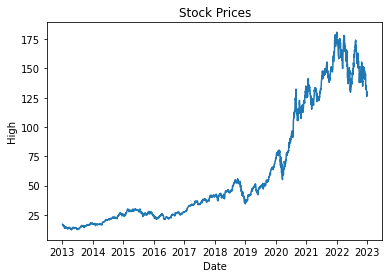

In [8]:
# fig = go.Figure()
# obj = go.Scatter(
#     x = ,
#     y = ,
#     mode = 'lines',
#     name="High",
# )
# fig.add_trace(obj)
# fig.update_layout(title='Stock Prices' , legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
# fig.show()

plt.plot(df['Date'], df['Adj Close'])
# Adding Title to the Plot
plt.title("Stock Prices") 
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

**Find 3 day moving average**

In [9]:
df['MA3'] = df['Adj Close'].rolling(3, min_periods=1).mean()

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA3
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,16.862818
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,16.756400
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,16.566333
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400,16.309055
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200,16.137159


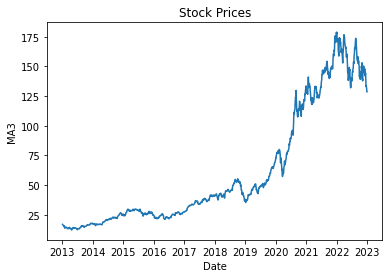

In [11]:
plt.plot(df['Date'], df['MA3'])
# Adding Title to the Plot
plt.title("Stock Prices") 
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('MA3')
plt.show()

**Split data into train and test**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['MA3']], test_size=.2)

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
preds = reg.predict(X_test)

In [16]:
print("Model Coefficients:", reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
print("Coefficient of Determination:", r2_score(y_test, preds))

Model Coefficients: [[0.99956067]]
Mean Absolute Error: 0.6943383909501325
Coefficient of Determination: 0.9993510845938008


**Find 9 day moving average**

In [17]:
df['MA9'] = df['Adj Close'].rolling(9, min_periods=1).mean()

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA3,MA9
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,16.862818,16.862818
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,16.756400,16.756400
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,16.566333,16.566333
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.090986,484156400,16.309055,16.447496
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.134293,458707200,16.137159,16.384855


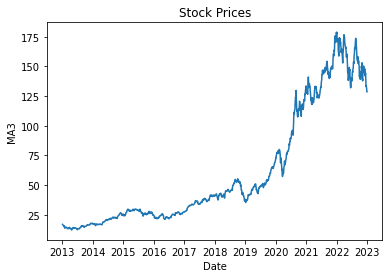

In [19]:
plt.plot(df['Date'], df['MA3'])
# Adding Title to the Plot
plt.title("Stock Prices") 
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('MA3')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['MA9']], test_size=.2)

In [21]:
reg = LinearRegression()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)

In [22]:
print("Model Coefficients:", reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
print("Coefficient of Determination:", r2_score(y_test, preds))

Model Coefficients: [[0.99643314]]
Mean Absolute Error: 1.3933569503622185
Coefficient of Determination: 0.9977594406897216
